In [1]:
# Gerekli kütüphaneleri import edelim.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Kullanacağımız veri setini import edelim
df = pd.read_csv("dataset/linear_regression_dataset.csv", sep=";")

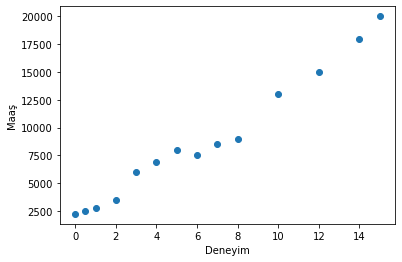

In [3]:
# Veriyi plot diagram ile görselleştirelim
plt.scatter(df["deneyim"], df["maas"])
plt.xlabel("Deneyim")
plt.ylabel("Maaş")
plt.show()

In [4]:
# Lineer Regresyon modeline line fit edeceğiz
# sklearn kütüphanesini kullanacağız
# Bu kütüphanenin içerisinde çeşitli makine öğrenmesi metotları var
from sklearn.linear_model import LinearRegression

In [5]:
# Lineer Regresoyon modeli
linear_reg = LinearRegression()

In [6]:
# Veri seti içerisindeki feature'ları yerleştiriyoruz
# X = örnek değerler
# y = tahmin değeri
X = df["deneyim"].values
y = df["maas"].values

In [7]:
# Bu noktada X ve y değişkenlerinin boyutları (14, 0)'dır
# Ancak sklearn kütüphanesi ile çalışabilmek için (14, 1) olmalı
# Bunu gerçekleştirmek için reshape(-1,1) metodunu kullanacağız.
X = df["deneyim"].values.reshape(-1,1)
y = df["maas"].values.reshape(-1,1)

In [8]:
# Line Fit
linear_reg.fit(X, y)

LinearRegression()

In [9]:
# fit() metodunu uyguladığımız lineer regresyon modelini kullanarak prediction gerçekleştirelim.
# Basit lineer regresyon formülünü hatırlayalım -> y = b_0 + b_1 * x
# Prediction yaparken x'e deper veriyoruz, x: feature
# x'e 0 değerini verdiğimizde predict değeri olan y, b_0'a eşit olur.
b_0 = linear_reg.predict([[0]])

In [10]:
# b_0, intercept olarak adlandırılır, yani regresyon doğrusunun y eksenini kestiği noktayı ifade eder.
# b_0 değerini görelim
print(f"b_0: {b_0}") # 1663.89519747

b_0: [[1663.89519747]]


In [11]:
# b_0'ın intercept olarak adlandırıldığını belirtmiştik. Şimdi de intercept bulmak için kullanılan bir diğer yöntemi inceleyelim.
b_0 = linear_reg.intercept_
print(f"b_0: {b_0}") # 1663.89519747

b_0: [1663.89519747]


In [12]:
# Şimdi de b_1'i yanmi coefficient değerini bulalım
# Coefficient değeri eğim miktarını belirtir, eğim: slope
b_1 = linear_reg.coef_
print(f"b_1: {b_1}") # 1138.34819698

b_1: [[1138.34819698]]


In [13]:
# Bu noktada y = b_0 + b_1 * x formülü içerisindeki b_0 ve b_1 verilerine ulaştık.
# Dolayısıyla istediğimiz maaş tahminini, deneyim feature'unu(x) kullanarak tahmin edebiliriz.
# Bir örnek yapalım, deneyim yılımız 11 olsun
salary_prediction = 1663.89519747 + 1138.34819698 * 11
print(f"Salary for 11 years experience: {salary_prediction}") # 14185.72536425

Salary for 11 years experience: 14185.72536425


In [14]:
# Biz bu işlemi yaparken, eğitici olması bakımından önce b_0 ve b_1 değerlerine ulaştık.
# Ancak sklearn kütüphanesinin metotlarından biri olan predict() ile direkt olarak maaş bilgisine ulaşabiliriz.
# Bir örnek yapalım
salary_prediction = linear_reg.predict([[11]])
print(f"Salary for 11 years experience: {salary_prediction}") # 14185.72536425
# Görüldüğü üzere aynı sonuca ulaştık

Salary for 11 years experience: [[14185.72536421]]


In [15]:
# predict() metodu sıralı bir şekilde deneyim süresi verebilmek için aşağıdaki array oluşturuldu
experience_array = np.arange(16).reshape(-1, 1)

In [16]:
# experienceArray dizisindeki her bir deneyim yılı değeri için maaş tahmini yapalım
y_head = linear_reg.predict(experience_array)

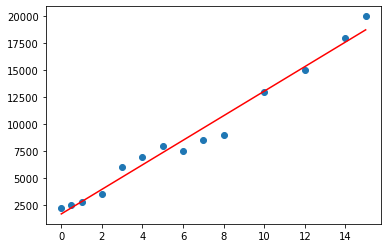

In [17]:
# Regresyon doğrusunu görselleştirelim
# Deneyim yılları ve deneyim yıllarına göre oluşan maaş tahmini için üretilen regresyon doğrusunu görelim
plt.scatter(X, y)
plt.plot(experience_array, y_head, color="red")
plt.show()